#####  1. Make a binary classification dataset with Scikit-Learn's make_moons() function

In [152]:
import torch 
RANDOM_SEED = 42
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch import nn
from helper_functions import plot_decision_boundary, plot_predictions






# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X_moons , y_moons = make_moons(n_samples= 1000, 
                               noise= 0.15,
                               random_state=RANDOM_SEED)

# Trun data into tensors

X_moons = torch.from_numpy(X_moons).type(torch.float)
y_moons = torch.from_numpy(y_moons).type(torch.float)

X_moons[:5] , y_moons[:5]

(tensor([[-0.0816,  0.4822],
         [ 1.0873, -0.3812],
         [ 0.8317, -0.1331],
         [ 0.2003, -0.5003],
         [-0.8250,  0.5395]]),
 tensor([1., 1., 1., 1., 0.]))

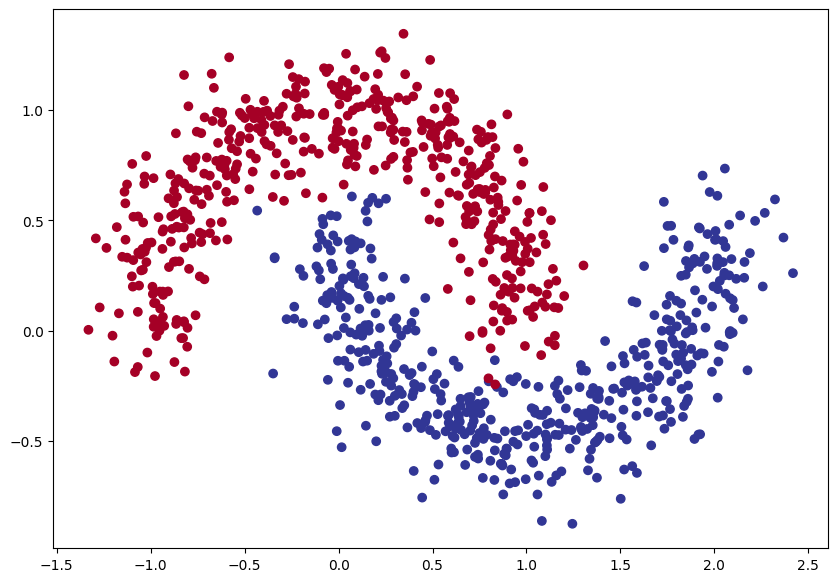

In [153]:
# Split into train and test set

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split( X_moons ,
                                                                            y_moons,
                                                                            test_size=0.2,
                                                                            random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_moons[:,0],X_moons[:,1], c=y_moons, cmap=plt.cm.RdYlBu) 

Building the Moon Model

In [154]:
class MoonModel(nn.Module):
    def __init__(self, **kwargs)-> None:
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=kwargs['input_features'], out_features=kwargs['hidden_units']),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=kwargs['hidden_units'], out_features=kwargs['hidden_units']),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            # how many classes are there?
            nn.Linear(in_features=kwargs['hidden_units'], out_features=kwargs['output_features']),
        )

    def forward(self, x):
        """Forward pass of the model."""
        x = self.linear_layer_stack(x)
        return x
    


In [155]:
# Create an instance of MoonModel and send it to target device

model = MoonModel(input_features = 2,
                output_features= 1,
                hidden_units = 8)

model

MoonModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

 Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [156]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters()
                            , lr = 0.03)


In [157]:
loss_fn.__dict__ , optimizer

({'training': True,
  '_parameters': OrderedDict(),
  '_buffers': OrderedDict([('weight', None), ('pos_weight', None)]),
  '_non_persistent_buffers_set': set(),
  '_backward_pre_hooks': OrderedDict(),
  '_backward_hooks': OrderedDict(),
  '_is_full_backward_hook': None,
  '_forward_hooks': OrderedDict(),
  '_forward_hooks_with_kwargs': OrderedDict(),
  '_forward_pre_hooks': OrderedDict(),
  '_forward_pre_hooks_with_kwargs': OrderedDict(),
  '_state_dict_hooks': OrderedDict(),
  '_state_dict_pre_hooks': OrderedDict(),
  '_load_state_dict_pre_hooks': OrderedDict(),
  '_load_state_dict_post_hooks': OrderedDict(),
  '_modules': OrderedDict(),
  'reduction': 'mean'},
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.03
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [158]:
model.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('linear_layer_stack',
               Sequential(
                 (0): Linear(in_features=2, out_features=8, bias=True)
                 (1): Linear(in_features=8, out_features=8, bias=True)
                 (2): Linear(in_features=8, out_features=1, bias=True)
               ))])}

 Create a training and testing loop to fit the model

 * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accurac


In [159]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [160]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_moons_test.to(device))[:5]
y_logits

tensor([[-0.2214],
        [-0.3878],
        [-0.4088],
        [-0.3637],
        [-0.5136]])

In [161]:
y_logits.squeeze().shape

torch.Size([5])

In [162]:
y_logits = model(X_moons_test.to(device))
y_logits

tensor([[-0.2214],
        [-0.3878],
        [-0.4088],
        [-0.3637],
        [-0.5136],
        [-0.5929],
        [-0.3921],
        [-0.3815],
        [-0.3539],
        [-0.3076],
        [-0.3403],
        [-0.2383],
        [-0.4001],
        [-0.4246],
        [-0.2005],
        [-0.5795],
        [-0.1490],
        [-0.2811],
        [-0.2468],
        [-0.2935],
        [-0.3485],
        [ 0.1220],
        [-0.2610],
        [-0.2383],
        [-0.3013],
        [-0.3141],
        [-0.0813],
        [ 0.1305],
        [-0.1095],
        [-0.4691],
        [-0.1038],
        [-0.3198],
        [-0.2547],
        [-0.5253],
        [-0.3100],
        [-0.1534],
        [-0.2009],
        [-0.3738],
        [-0.5302],
        [-0.4269],
        [-0.2572],
        [-0.3293],
        [-0.0933],
        [ 0.1273],
        [-0.2407],
        [-0.1177],
        [ 0.1403],
        [-0.3454],
        [-0.0712],
        [-0.6160],
        [-0.2757],
        [-0.2842],
        [ 0.

In [163]:
X_moons_test

tensor([[ 5.9313e-01, -4.3241e-01],
        [ 1.0161e+00,  5.3222e-01],
        [ 1.3420e+00, -3.9259e-01],
        [ 8.1386e-01,  9.3438e-01],
        [ 1.7476e+00, -3.1857e-01],
        [ 2.0221e+00, -1.3930e-01],
        [ 1.1174e+00,  2.1099e-01],
        [ 1.1009e+00,  1.0881e-01],
        [ 1.2447e+00, -8.7374e-01],
        [ 6.8288e-01,  5.6493e-01],
        [ 8.0802e-01,  5.9316e-01],
        [ 6.7095e-01, -4.6851e-01],
        [ 1.1024e+00,  3.9266e-01],
        [ 1.5021e+00, -7.6061e-01],
        [ 8.7824e-02,  1.1826e+00],
        [ 1.8495e+00,  3.1584e-01],
        [ 2.2837e-01, -1.5833e-01],
        [ 4.7845e-01,  9.3677e-01],
        [ 7.0116e-01, -4.5169e-01],
        [ 5.1090e-01,  1.0056e+00],
        [ 8.2659e-01,  6.4849e-01],
        [-8.7399e-01, -1.4166e-01],
        [ 7.6118e-01, -4.6124e-01],
        [ 2.2133e-01,  1.2590e+00],
        [ 6.7872e-01,  4.8260e-01],
        [ 8.2628e-01,  1.1454e-01],
        [-2.8421e-01,  7.5700e-01],
        [-9.8878e-01,  1.663

In [164]:
# Perform Sigmoid calculation on y_logits across dimentsion 1 to get prediction probabilities

pred_probs = torch.sigmoid(y_logits)
pred_probs


tensor([[0.4449],
        [0.4043],
        [0.3992],
        [0.4101],
        [0.3743],
        [0.3560],
        [0.4032],
        [0.4058],
        [0.4124],
        [0.4237],
        [0.4157],
        [0.4407],
        [0.4013],
        [0.3954],
        [0.4500],
        [0.3590],
        [0.4628],
        [0.4302],
        [0.4386],
        [0.4271],
        [0.4138],
        [0.5305],
        [0.4351],
        [0.4407],
        [0.4252],
        [0.4221],
        [0.4797],
        [0.5326],
        [0.4726],
        [0.3848],
        [0.4741],
        [0.4207],
        [0.4367],
        [0.3716],
        [0.4231],
        [0.4617],
        [0.4499],
        [0.4076],
        [0.3705],
        [0.3949],
        [0.4361],
        [0.4184],
        [0.4767],
        [0.5318],
        [0.4401],
        [0.4706],
        [0.5350],
        [0.4145],
        [0.4822],
        [0.3507],
        [0.4315],
        [0.4294],
        [0.5306],
        [0.5172],
        [0.4717],
        [0

In [165]:

# Let's calculuate the accuracy using accuracy from TorchMetrics
! pip  install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
epochs = 1000

def accuracy_fn(y_true, y_pred):
    # torch.eq() calculates where two tensors are equal
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


# Fit the model
torch.manual_seed(42)

# Put all data on target device
X_moons_train, y_moons_train = X_moons_train.to(device), y_moons_train.to(device)
X_moons_test, y_moons_test = X_moons_test.to(device), y_moons_test.to(device)

for epoch in range(epochs):

    model.train()
    # 1. Forward pass
    y_logits = model(X_moons_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_moons_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_moons_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_moons_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_moons_test)
      test_acc = accuracy_fn(y_true=y_moons_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.75625, Accuracy: 35.12% | Test Loss: 0.74400, Test Accuracy: 39.00%
Epoch: 100 | Loss: 0.46760, Accuracy: 81.62% | Test Loss: 0.48083, Test Accuracy: 79.50%
Epoch: 200 | Loss: 0.33510, Accuracy: 83.12% | Test Loss: 0.35398, Test Accuracy: 81.50%
Epoch: 300 | Loss: 0.30127, Accuracy: 84.62% | Test Loss: 0.31360, Test Accuracy: 83.50%
Epoch: 400 | Loss: 0.28314, Accuracy: 86.12% | Test Loss: 0.28986, Test Accuracy: 85.00%
Epoch: 500 | Loss: 0.27399, Accuracy: 87.00% | Test Loss: 0.27653, Test Accuracy: 85.50%
Epoch: 600 | Loss: 0.27009, Accuracy: 87.12% | Test Loss: 0.26976, Test Accuracy: 85.50%
Epoch: 700 | Loss: 0.26860, Accuracy: 87.38% | Test Loss: 0.26644, Test Accuracy: 85.50%
Epoch: 800 | Loss: 0.26806, Accuracy: 87.12% | Test Loss: 0.26479, Test Accuracy: 85.50%
Epoch: 900 | Loss: 0.26787, Accuracy: 87.38% | Test Loss: 0.26394, Test Accuracy: 85.00%


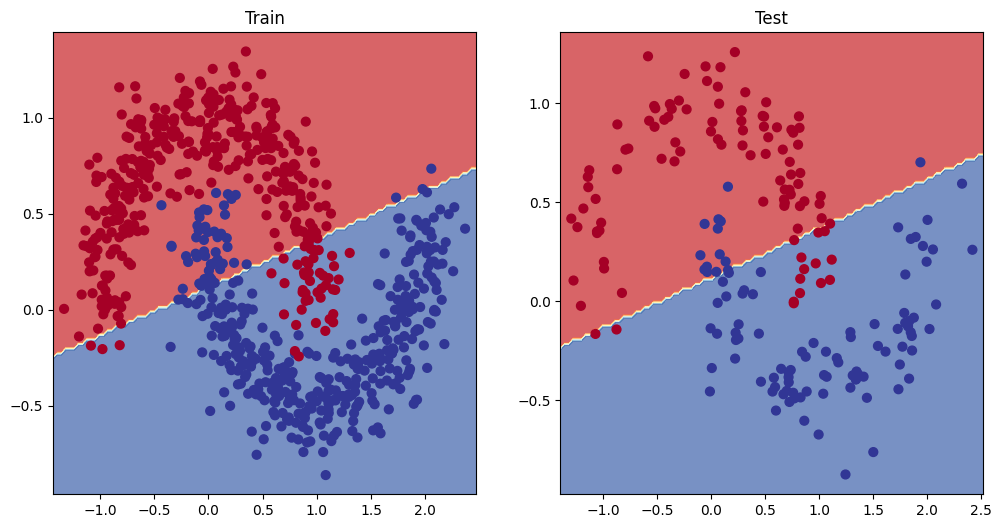

In [167]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_moons_train, y_moons_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_moons_test, y_moons_test)

Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

In [177]:
class MoonModel2(nn.Module):
    def __init__(self, **kwargs)-> None:
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=kwargs['input_features'], out_features=kwargs['hidden_units']),
            nn.Tanh(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=kwargs['hidden_units'], out_features=kwargs['hidden_units']),
            nn.Tanh(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            # how many classes are there?
            nn.Linear(in_features=kwargs['hidden_units'], out_features=kwargs['output_features']),
            nn.Tanh()
       
	# return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
        )

    def forward(self, x):
        """Forward pass of the model."""
        x = self.linear_layer_stack(x)
        return x
    


In [178]:

model_2 = MoonModel2(input_features = 2,
                output_features= 1,
                hidden_units = 8)


loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters()
                            , lr = 0.1)

epochs = 2000

def accuracy_fn(y_true, y_pred):
    # torch.eq() calculates where two tensors are equal
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


# Fit the model
torch.manual_seed(42)

# Put all data on target device
X_moons_train, y_moons_train = X_moons_train.to(device), y_moons_train.to(device)
X_moons_test, y_moons_test = X_moons_test.to(device), y_moons_test.to(device)

for epoch in range(epochs):

    model_2.train()
    # 1. Forward pass
    y_logits = model_2(X_moons_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_moons_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_moons_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_2(X_moons_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_moons_test)
      test_acc = accuracy_fn(y_true=y_moons_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.73302, Accuracy: 36.00% | Test Loss: 0.72344, Test Accuracy: 39.00%
Epoch: 100 | Loss: 0.47112, Accuracy: 84.00% | Test Loss: 0.48253, Test Accuracy: 82.00%
Epoch: 200 | Loss: 0.44191, Accuracy: 87.62% | Test Loss: 0.44856, Test Accuracy: 86.00%
Epoch: 300 | Loss: 0.43496, Accuracy: 87.38% | Test Loss: 0.44015, Test Accuracy: 86.50%
Epoch: 400 | Loss: 0.43244, Accuracy: 87.50% | Test Loss: 0.43725, Test Accuracy: 87.00%
Epoch: 500 | Loss: 0.43091, Accuracy: 87.62% | Test Loss: 0.43551, Test Accuracy: 87.00%
Epoch: 600 | Loss: 0.42957, Accuracy: 87.62% | Test Loss: 0.43393, Test Accuracy: 87.00%
Epoch: 700 | Loss: 0.42805, Accuracy: 87.88% | Test Loss: 0.43204, Test Accuracy: 86.50%
Epoch: 800 | Loss: 0.42603, Accuracy: 88.25% | Test Loss: 0.42943, Test Accuracy: 86.50%
Epoch: 900 | Loss: 0.42312, Accuracy: 88.38% | Test Loss: 0.42555, Test Accuracy: 87.00%
Epoch: 1000 | Loss: 0.41872, Accuracy: 89.00% | Test Loss: 0.41959, Test Accuracy: 87.50%
Epoch: 1100 | Loss: 0.

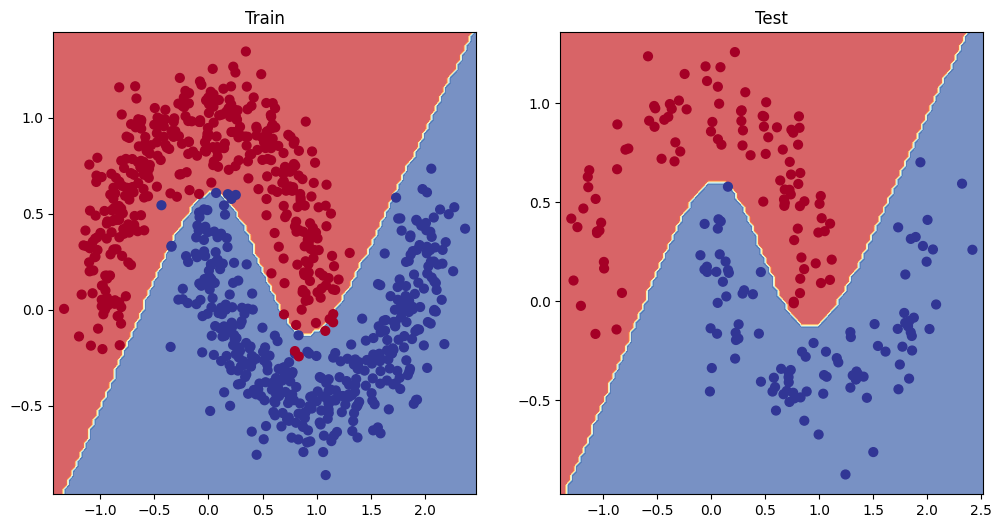

In [179]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_moons_train, y_moons_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_moons_test, y_moons_test)

##### Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).


* Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
* Plot the decision boundaries on the spirals dataset from your model predictions, the  plot_decision_boundary() function should work for this dataset too.

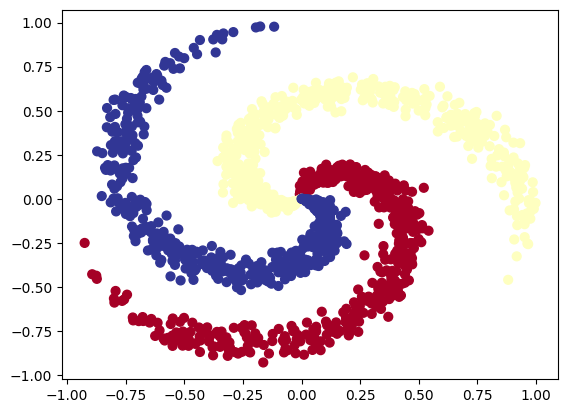

In [186]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [191]:
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X,
    y,
    test_size=0.2,
    random_state=RANDOM_SEED
)


In [246]:
from torch import nn

# Build model
class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        # self.linear_layer_stack = nn.Sequential(
        #     nn.Tanh(),
        #     nn.Linear(in_features=input_features, out_features=hidden_units),
        #     nn.Tanh(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        #     nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #     nn.Tanh(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        #     nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        #     nn.Tanh()
        # )
        self.linear_layer_stack = nn.Sequential(
            nn.Tanh(),
            nn.LazyLinear(out_features=hidden_units),
            nn.Tanh(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.LazyLinear( out_features=hidden_units),
            nn.Tanh(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.LazyLinear(out_features=output_features), # how many classes are there?
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = SpiralModel(input_features=2, 
                    output_features=3, 
                    hidden_units=50).to(device)
model_4

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Tanh()
    (1): LazyLinear(in_features=0, out_features=50, bias=True)
    (2): Tanh()
    (3): LazyLinear(in_features=0, out_features=50, bias=True)
    (4): Tanh()
    (5): LazyLinear(in_features=0, out_features=3, bias=True)
    (6): Tanh()
  )
)

In [250]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),  
                            lr=0.15) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [251]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4.forward(X_blob_train.to(device))[:5]

tensor([[ 0.9707, -0.9849,  0.3170],
        [-0.4442,  0.1447,  0.2356],
        [-0.9857,  0.9509,  0.2943],
        [ 0.6087, -0.8489,  0.5462],
        [ 0.9584, -0.9657, -0.3870]], grad_fn=<SliceBackward0>)

In [252]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 2000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 0.65777, Acc: 68.25% | Test Loss: 0.68685, Test Acc: 66.67%
Epoch: 10 | Loss: 0.64725, Acc: 69.42% | Test Loss: 0.67673, Test Acc: 68.00%
Epoch: 20 | Loss: 0.63691, Acc: 71.42% | Test Loss: 0.66663, Test Acc: 69.33%
Epoch: 30 | Loss: 0.62688, Acc: 73.92% | Test Loss: 0.65672, Test Acc: 70.33%
Epoch: 40 | Loss: 0.61721, Acc: 75.25% | Test Loss: 0.64710, Test Acc: 72.00%
Epoch: 50 | Loss: 0.60793, Acc: 76.92% | Test Loss: 0.63784, Test Acc: 72.00%
Epoch: 60 | Loss: 0.59905, Acc: 78.17% | Test Loss: 0.62896, Test Acc: 73.00%
Epoch: 70 | Loss: 0.59057, Acc: 79.42% | Test Loss: 0.62048, Test Acc: 73.67%
Epoch: 80 | Loss: 0.58248, Acc: 79.83% | Test Loss: 0.61240, Test Acc: 74.33%
Epoch: 90 | Loss: 0.57479, Acc: 80.33% | Test Loss: 0.60470, Test Acc: 75.33%
Epoch: 100 | Loss: 0.56746, Acc: 81.25% | Test Loss: 0.59737, Test Acc: 75.33%
Epoch: 110 | Loss: 0.56050, Acc: 81.58% | Test Loss: 0.59040, Test Acc: 75.33%
Epoch: 120 | Loss: 0.55388, Acc: 82.08% | Test Loss: 0.58376, T

In [253]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.9972, -0.9838,  0.9976],
        [-0.9438, -0.9638,  0.9918],
        [ 0.9996, -1.0000, -0.7591],
        [ 0.9914, -0.9972, -0.9797],
        [ 0.9898, -0.9997, -0.4700],
        [-0.9956,  0.9986, -0.9853],
        [ 0.4442, -0.9992,  0.9380],
        [-0.9846,  0.9013, -0.7459],
        [-0.8893, -0.9299,  0.5102],
        [ 0.8319, -0.9824, -0.9150]])

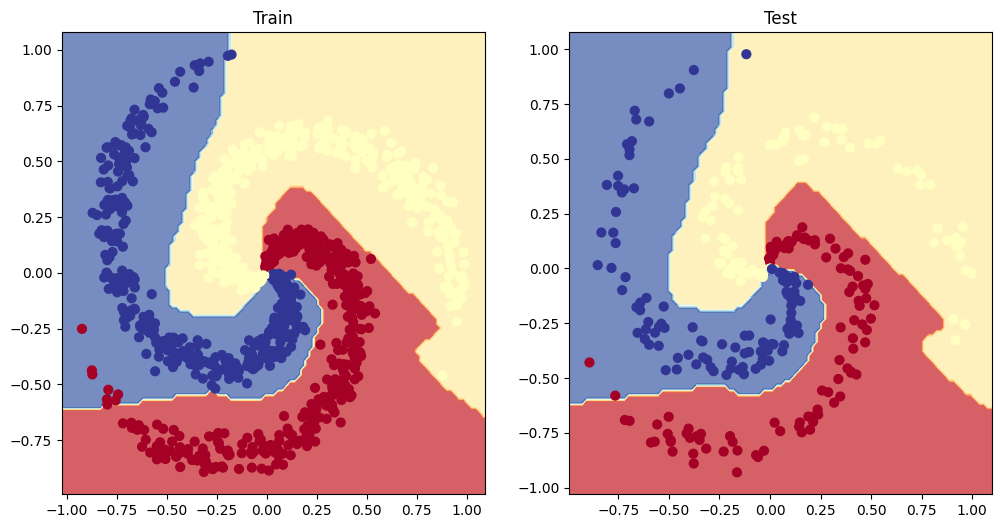

In [254]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)